In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import torch
import torchvision
import numpy as np
import captum.optim as optimviz

In [3]:
from typing import Callable, Dict, List, Optional, Tuple
import numpy as np
import matplotlib.pyplot as plt

LossFunction = Callable[[Dict[torch.nn.Module, Optional[torch.Tensor]]], torch.Tensor]

# Show a nice plot of a tensor
def show(
    x: torch.Tensor, figsize: Optional[Tuple[int, int]] = None, scale: float = 255.0
) -> None:
    assert x.dim() == 3 or x.dim() == 4
    x = x[0] if x.dim() == 4 else x
    x = x.cpu().permute(1, 2, 0) * scale
    if figsize is not None:
        plt.figure(figsize=figsize)
    plt.imshow(x.numpy().astype(np.uint8))
    plt.axis("off")
    plt.show()

In [4]:
from expanded_weights import model, get_expanded_weights

Max: tensor(325)
Min: tensor(3)


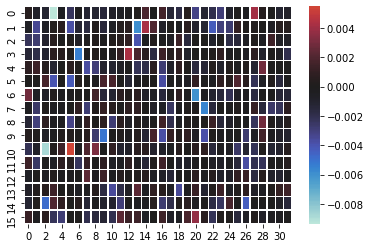

<Figure size 576x432 with 0 Axes>

In [35]:
# from scipy.spatial import distance
import matplotlib.pyplot as plt
import seaborn as sns
# from PIL import Image
# from torchvision import transforms

# image = Image.open("../../seri/datasets/test_images/trump.png")
# image = image.convert("RGB")
# transform = transforms.Compose([
#     transforms.Resize((224, 224)),
#     transforms.ToTensor()
# ])
# t = transform(image).reshape((1, 3, 224, 224))

# weightmap1 = get_expanded_weights(model.layer4[0].conv3, model.layer4[2].conv3, t).reshape((-1,))

unit = 2

weightmap = get_expanded_weights(model.layer4[1].conv2, model.layer4[1].conv3)
meaned_weightmap = weightmap.mean(2).mean(2)

heatmap = meaned_weightmap[unit].reshape((16,32))
print("Max:", np.argmax(meaned_weightmap[unit]))
print("Min:", np.argmin(meaned_weightmap[unit]))
ax = sns.heatmap(heatmap, linewidth=0.5, center=0)

plt.figure(figsize=(8, 6))
plt.show()

In [10]:
distance.cosine([1,0,0],[1,0,0])

0.0